In [3]:
import pandas as pd 
import numpy as np
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [89]:
import os 
dir_path = "/Users/admin/Documents/BT4012/Project/BT4012_Reviews/Notebooks/feature engineering"
os.chdir(dir_path)
df = pd.read_csv('data_cleaned.csv')

In [90]:
df.head()

,reviewDate,reviewID,reviewerID,reviewContent,restaurantID,flagged,reviewerName,reviewerLocation,reviewerYelpJoinDate,reviewerFriendCount,...,sentiment,polarity,subjectivity,main_topic,reviewRating_1,reviewRating_2,reviewRating_3,reviewRating_4,reviewRating_5,reviewRating
0,9/22/2012,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",pbEiXam9YJL3neCYHGwLUA,0,Scott E.,"Glengary, WV",2009-10-01,0.002337,...,"Sentiment(polarity=0.13913951545530495, subjec...",0.139140,0.528655,0.868421,False,False,False,False,True,5
1,9/22/2012,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,pbEiXam9YJL3neCYHGwLUA,0,Jerry K.,"Palos Verdes Peninsula, CA",2011-06-01,0.000000,...,"Sentiment(polarity=0.4666666666666666, subject...",0.466667,0.566667,0.263158,False,False,False,False,True,5
2,9/19/2012,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,pbEiXam9YJL3neCYHGwLUA,0,Patricia M.,"Chicago, IL",2008-09-01,0.000425,...,"Sentiment(polarity=0.4133333333333334, subject...",0.413333,0.720000,0.473684,False,False,True,False,False,3
3,9/6/2012,iSN,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",pbEiXam9YJL3neCYHGwLUA,0,Terry N.,"San Jose, CA",2007-10-01,0.017850,...,"Sentiment(polarity=0.12054824561403507, subjec...",0.120548,0.535201,0.868421,False,False,True,False,False,3
4,9/9/2012,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,pbEiXam9YJL3neCYHGwLUA,0,Shradha Vegetarianista A.,"Chicago, IL",2007-07-01,0.070761,...,"Sentiment(polarity=0.16746031746031745, subjec...",0.167460,0.564683,0.868421,False,False,False,False,True,5


In [91]:
df.columns

Index(['reviewDate', 'reviewID', 'reviewerID', 'reviewContent', 'restaurantID',
       'flagged', 'reviewerName', 'reviewerLocation', 'reviewerYelpJoinDate',
       'reviewerFriendCount', 'reviewerNumReviews', 'reviewerFirstCount',
       'reviewerUsefulCount', 'reviewerCoolCount', 'reviewerFunnyCount',
       'reviewerComplimentCount', 'reviewerTipCount', 'reviewerFanCount',
       'resLocation', 'resName', 'resReviewCount', 'resRating', 'DATE_TIME',
       'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON', 'PHONE_NUMBER',
       'DATE_TIME_count', 'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count',
       'PERSON_count', 'PHONE_NUMBER_count', 'DATE_TIME_flag',
       'EMAIL_ADDRESS_flag', 'NRP_flag', 'LOCATION_flag', 'PERSON_flag',
       'PHONE_NUMBER_flag', 'reviewDate2', 'date_diff_joinedandreviewed',
       'word_count', 'char_count', 'tokens', 'clean_tokens', 'clean_text',
       'ngrams', 'preprocessed', 'Num_Char', 'Num_Punc', 'verb_count',
       'adj_count', 'sentiment', 'polar

In [92]:
num_columns = df.shape[1]
print(num_columns)

63


In [93]:
column_data_types = df.dtypes
print(column_data_types)

reviewDate        object
reviewID          object
reviewerID        object
reviewContent     object
restaurantID      object
                   ...  
reviewRating_2      bool
reviewRating_3      bool
reviewRating_4      bool
reviewRating_5      bool
reviewRating       int64
Length: 63, dtype: object


In [94]:
string_columns = df.select_dtypes(include=['object']).columns
df_numerical = df.drop(columns=string_columns)

In [95]:
X = df_numerical.drop(["flagged", "polarity"] ,axis=1 )
y = df_numerical['flagged']

In [96]:
X

,reviewerFriendCount,reviewerNumReviews,reviewerFirstCount,reviewerUsefulCount,reviewerCoolCount,reviewerFunnyCount,reviewerComplimentCount,reviewerTipCount,reviewerFanCount,resReviewCount,...,verb_count,adj_count,subjectivity,main_topic,reviewRating_1,reviewRating_2,reviewRating_3,reviewRating_4,reviewRating_5,reviewRating
0,0.002337,0.018008,0.018008,0.001885,0.000254,0.000279,0.000050,0.000000,0.001563,841,...,0.776256,0.427350,0.528655,0.868421,False,False,False,False,True,5
1,0.000000,0.001149,0.001149,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,841,...,0.068493,0.068376,0.566667,0.263158,False,False,False,False,True,5
2,0.000425,0.003831,0.003831,0.000276,0.000000,0.000056,0.000000,0.000000,0.000000,841,...,0.063927,0.042735,0.720000,0.473684,False,False,True,False,False,3
3,0.017850,0.022605,0.022605,0.001609,0.000406,0.000335,0.000150,0.005078,0.000000,841,...,0.237443,0.290598,0.535201,0.868421,False,False,True,False,False,3
4,0.070761,0.462835,0.462835,0.075869,0.034472,0.023258,0.007082,0.010157,0.109375,841,...,0.123288,0.170940,0.564683,0.868421,False,False,False,False,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26951,0.006587,0.062835,0.062835,0.009242,0.002843,0.000948,0.000601,0.000000,0.004687,14,...,0.105023,0.051282,0.760173,0.763158,False,False,False,True,False,4
26952,0.001275,0.003831,0.003831,0.000322,0.000102,0.000000,0.000025,0.000000,0.001563,15,...,0.077626,0.076923,0.608333,0.894737,False,False,False,False,True,5
26953,0.002762,0.018391,0.018391,0.002667,0.000457,0.000558,0.000175,0.000462,0.001563,16,...,0.027397,0.042735,0.588095,0.263158,False,False,True,False,False,3
26954,0.002762,0.018391,0.018391,0.002667,0.000457,0.000558,0.000175,0.000462,0.001563,17,...,0.068493,0.042735,0.658333,0.552632,False,False,True,False,False,3


In [97]:
## Chi2 Test for Feature Selection
selector = SelectKBest(chi2, k=15)
fit = selector.fit(X, y)
chi2_selected = selector.get_support()
importance_df_chi = pd.DataFrame()
importance_df_chi['Feature'] = X.columns 
importance_df_chi['Important_chi'] = chi2_selected
importance_df_chi

,Feature,Important_chi
0,reviewerFriendCount,True
1,reviewerNumReviews,True
2,reviewerFirstCount,True
3,reviewerUsefulCount,True
4,reviewerCoolCount,False
5,reviewerFunnyCount,False
6,reviewerComplimentCount,False
7,reviewerTipCount,False
8,reviewerFanCount,True
9,resReviewCount,True


#### Selected == False for Chi Squared Statistic 

In [105]:
important = importance_df_chi[importance_df_chi["Important_chi"] == True]
important

,Feature,Important_chi
0,reviewerFriendCount,True
1,reviewerNumReviews,True
2,reviewerFirstCount,True
3,reviewerUsefulCount,True
8,reviewerFanCount,True
9,resReviewCount,True
17,DATE_TIME_flag,True
23,date_diff_joinedandreviewed,True
24,word_count,True
25,char_count,True


In [100]:
unimportant = importance_df_chi[importance_df_chi["Important_chi"] == False]
unimportant

,Feature,Important_chi
4,reviewerCoolCount,False
5,reviewerFunnyCount,False
6,reviewerComplimentCount,False
7,reviewerTipCount,False
10,resRating,False
11,DATE_TIME_count,False
12,EMAIL_ADDRESS_count,False
13,NRP_count,False
14,LOCATION_count,False
15,PERSON_count,False


In [88]:
selected_features = importance_df_chi[importance_df_chi['Important_chi']]
print(selected_features)

                        Feature  Important_chi
0           reviewerFriendCount           True
1            reviewerNumReviews           True
2            reviewerFirstCount           True
3           reviewerUsefulCount           True
8              reviewerFanCount           True
9                resReviewCount           True
17               DATE_TIME_flag           True
23  date_diff_joinedandreviewed           True
24                   word_count           True
25                   char_count           True
26                     Num_Char           True
32               reviewRating_1           True
34               reviewRating_3           True
35               reviewRating_4           True
36               reviewRating_5           True


In [29]:
selected_features = selected_features['Feature'].tolist()
selected_features

['reviewerFriendCount',
 'reviewerNumReviews',
 'reviewerFirstCount',
 'reviewerUsefulCount',
 'reviewerCoolCount',
 'reviewerFanCount',
 'resReviewCount',
 'DATE_TIME_flag',
 'date_diff_joinedandreviewed',
 'Num_Char',
 'adj_count',
 'reviewRating_1',
 'reviewRating_3',
 'reviewRating_4',
 'reviewRating_5']

In [31]:
X_features_selected = X[selected_features]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      6234
           1       0.78      0.72      0.75      1853

    accuracy                           0.89      8087
   macro avg       0.85      0.83      0.84      8087
weighted avg       0.89      0.89      0.89      8087



#### XGBoost Feature Selection 

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_numerical.drop('flagged', axis=1)
y = df_numerical['flagged']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 25% test set 

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train) # standardize features 
X_test_scaled = ss.transform(X_test) # same scaling 


In [63]:
df.columns

Index(['reviewDate', 'reviewID', 'reviewerID', 'reviewContent', 'restaurantID',
       'flagged', 'reviewerName', 'reviewerLocation', 'reviewerYelpJoinDate',
       'reviewerFriendCount', 'reviewerNumReviews', 'reviewerFirstCount',
       'reviewerUsefulCount', 'reviewerCoolCount', 'reviewerFunnyCount',
       'reviewerComplimentCount', 'reviewerTipCount', 'reviewerFanCount',
       'resLocation', 'resName', 'resReviewCount', 'resRating', 'DATE_TIME',
       'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON', 'PHONE_NUMBER',
       'DATE_TIME_count', 'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count',
       'PERSON_count', 'PHONE_NUMBER_count', 'DATE_TIME_flag',
       'EMAIL_ADDRESS_flag', 'NRP_flag', 'LOCATION_flag', 'PERSON_flag',
       'PHONE_NUMBER_flag', 'reviewDate2', 'date_diff_joinedandreviewed',
       'word_count', 'char_count', 'tokens', 'clean_tokens', 'clean_text',
       'ngrams', 'preprocessed', 'Num_Char', 'Num_Punc', 'verb_count',
       'adj_count', 'sentiment', 'polar

In [112]:
df["ngrams"]

0        [('unlike', 'next'), ('next', 'eaten'), ('eate...
1        [('probably', 'one'), ('one', 'best'), ('best'...
2        [('service', 'impeccable'), ('impeccable', 'ex...
3        [('problem', 'places'), ('places', 'like'), ('...
4        [('idea', 'write'), ('write', 'review'), ('rev...
                               ...                        
26951    [('taco', 'bell'), ('bell', 'higher'), ('highe...
26952    [('yellow', 'rose'), ('rose', 'favorite'), ('f...
26953    [('bad', 'ate'), ('ate', 'odd'), ('odd', 'wick...
26954    [('surprised', 'eagerly'), ('eagerly', 'roped'...
26955    [('gorgeous', 'shy'), ('shy', 'young'), ('youn...
Name: ngrams, Length: 26956, dtype: object

In [126]:
df2 = df.drop(columns=["reviewDate",'reviewID', 'reviewerID', 'reviewContent', 'restaurantID','reviewerName', 'reviewerLocation', 'reviewerYelpJoinDate','resLocation', 'resName','DATE_TIME',
       'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON', 'PHONE_NUMBER', 'reviewDate2','tokens', 'clean_tokens', 'clean_text','sentiment','reviewRating_1', 'reviewRating_2', 'reviewRating_3', 'reviewRating_4',
       'reviewRating_5','ngrams', 'preprocessed'])

df2

,flagged,reviewerFriendCount,reviewerNumReviews,reviewerFirstCount,reviewerUsefulCount,reviewerCoolCount,reviewerFunnyCount,reviewerComplimentCount,reviewerTipCount,reviewerFanCount,...,word_count,char_count,Num_Char,Num_Punc,verb_count,adj_count,polarity,subjectivity,main_topic,reviewRating
0,0,0.002337,0.018008,0.018008,0.001885,0.000254,0.000279,0.000050,0.000000,0.001563,...,871,4890,0.978779,0.446875,0.776256,0.427350,1.391395e-01,0.528655,0.868421,5
1,0,0.000000,0.001149,0.001149,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,66,350,0.069870,0.031250,0.068493,0.068376,4.666667e-01,0.566667,0.263158,5
2,0,0.000425,0.003831,0.003831,0.000276,0.000000,0.000056,0.000000,0.000000,0.000000,...,45,257,0.051251,0.028125,0.063927,0.042735,4.133333e-01,0.720000,0.473684,3
3,0,0.017850,0.022605,0.022605,0.001609,0.000406,0.000335,0.000150,0.005078,0.000000,...,358,2156,0.431431,0.262500,0.237443,0.290598,1.205482e-01,0.535201,0.868421,3
4,0,0.070761,0.462835,0.462835,0.075869,0.034472,0.023258,0.007082,0.010157,0.109375,...,172,951,0.190190,0.090625,0.123288,0.170940,1.674603e-01,0.564683,0.868421,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26951,0,0.006587,0.062835,0.062835,0.009242,0.002843,0.000948,0.000601,0.000000,0.004687,...,96,512,0.102302,0.050000,0.105023,0.051282,2.266234e-01,0.760173,0.763158,4
26952,0,0.001275,0.003831,0.003831,0.000322,0.000102,0.000000,0.000025,0.000000,0.001563,...,102,522,0.104304,0.053125,0.077626,0.076923,2.692708e-01,0.608333,0.894737,5
26953,0,0.002762,0.018391,0.018391,0.002667,0.000457,0.000558,0.000175,0.000462,0.001563,...,38,209,0.041642,0.025000,0.027397,0.042735,-1.190476e-01,0.588095,0.263158,3
26954,0,0.002762,0.018391,0.018391,0.002667,0.000457,0.000558,0.000175,0.000462,0.001563,...,63,347,0.069269,0.037500,0.068493,0.042735,6.938894e-18,0.658333,0.552632,3


In [107]:
df2.columns

Index(['flagged', 'reviewerFriendCount', 'reviewerNumReviews',
       'reviewerFirstCount', 'reviewerUsefulCount', 'reviewerCoolCount',
       'reviewerFunnyCount', 'reviewerComplimentCount', 'reviewerTipCount',
       'reviewerFanCount', 'resReviewCount', 'resRating', 'DATE_TIME_count',
       'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count', 'PERSON_count',
       'PHONE_NUMBER_count', 'DATE_TIME_flag', 'EMAIL_ADDRESS_flag',
       'NRP_flag', 'LOCATION_flag', 'PERSON_flag', 'PHONE_NUMBER_flag',
       'date_diff_joinedandreviewed', 'word_count', 'char_count',
       'preprocessed', 'Num_Char', 'Num_Punc', 'verb_count', 'adj_count',
       'polarity', 'subjectivity', 'main_topic', 'reviewRating'],
      dtype='object')

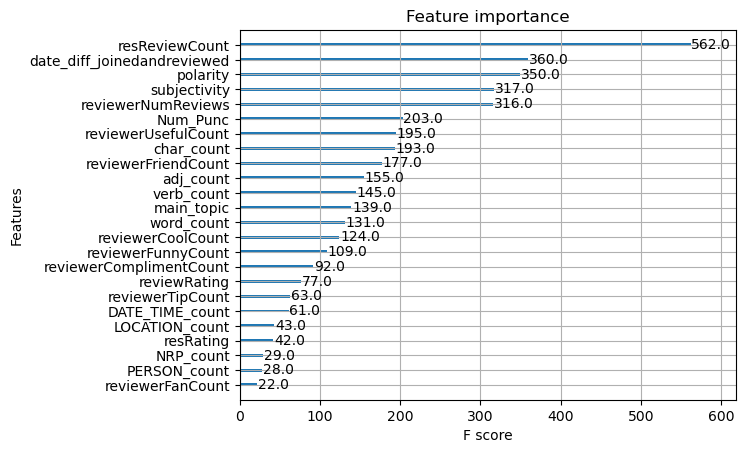

In [138]:
np.random.seed(120)
y_feature_selection = df2['flagged'] # dependent variable
x_feature_selection = df2.drop(columns=["flagged"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x_feature_selection, y_feature_selection, test_size=0.33, random_state=7)
model = XGBClassifier()
model.fit(x_feature_selection, y_feature_selection)
# plot feature importance
plot_importance(model)
plt.show()

### Recursive Feature Elimination

In [6]:
string_columns = df.select_dtypes(include=['object']).columns
df_numerical = df.drop(columns=string_columns)


In [7]:
X_continuous = df_numerical.drop(["flagged"] ,axis=1 )
y = df_numerical['flagged']
X_continuous.head()


,reviewerFriendCount,reviewerNumReviews,reviewerFirstCount,reviewerUsefulCount,reviewerCoolCount,reviewerFunnyCount,reviewerComplimentCount,reviewerTipCount,reviewerFanCount,resReviewCount,...,adj_count,polarity,subjectivity,main_topic,reviewRating_1,reviewRating_2,reviewRating_3,reviewRating_4,reviewRating_5,reviewRating
0,0.002337,0.018008,0.018008,0.001885,0.000254,0.000279,0.000050,0.000000,0.001563,841,...,0.427350,0.139140,0.528655,0.868421,False,False,False,False,True,5
1,0.000000,0.001149,0.001149,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,841,...,0.068376,0.466667,0.566667,0.263158,False,False,False,False,True,5
2,0.000425,0.003831,0.003831,0.000276,0.000000,0.000056,0.000000,0.000000,0.000000,841,...,0.042735,0.413333,0.720000,0.473684,False,False,True,False,False,3
3,0.017850,0.022605,0.022605,0.001609,0.000406,0.000335,0.000150,0.005078,0.000000,841,...,0.290598,0.120548,0.535201,0.868421,False,False,True,False,False,3
4,0.070761,0.462835,0.462835,0.075869,0.034472,0.023258,0.007082,0.010157,0.109375,841,...,0.170940,0.167460,0.564683,0.868421,False,False,False,False,True,5


/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

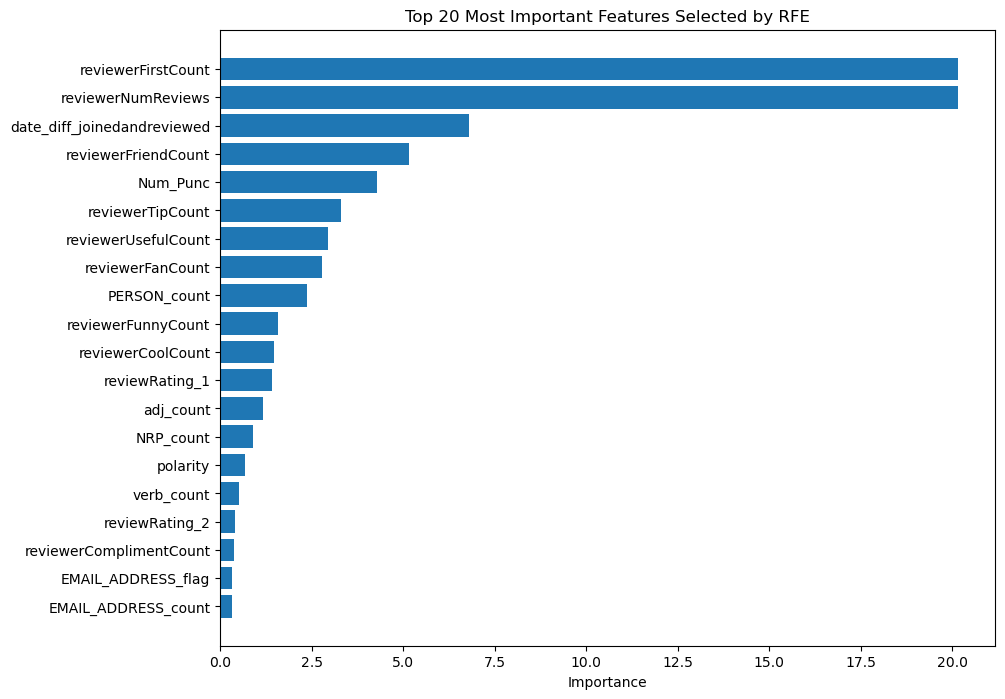

In [10]:
import matplotlib.pyplot as plt

# Fit the RFE if not already done
rfe.fit(X_continuous, y)

# Access the fitted model from within RFE
fitted_model = rfe.estimator_

# Ensure that the model is indeed fitted
if hasattr(fitted_model, 'coef_'):
    # Get the coefficients
    importance_scores = abs(fitted_model.coef_[0])

    # Get the indices of the selected features
    selected_indices = np.where(rfe.support_)[0]

    # Get the importance scores for the selected features
    selected_importances = importance_scores

    # Get the feature names for the selected features
    selected_feature_names = X_continuous.columns[rfe.support_]

    # Create a DataFrame to hold the feature names and their corresponding importances
    feature_importances = pd.DataFrame({
        'Feature': selected_feature_names,
        'Importance': selected_importances
    })

    # Sort the DataFrame based on the 'Importance' in descending order
    sorted_features = feature_importances.sort_values(by='Importance', ascending=False)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.barh(sorted_features['Feature'], sorted_features['Importance'])
    plt.xlabel('Importance')
    plt.title('Top 20 Most Important Features Selected by RFE')
    plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature on top
    plt.show()
else:
    print("Model has not been fitted or does not have the coef_ attribute.")


In [11]:
selected_feature_names

Index(['reviewerFriendCount', 'reviewerNumReviews', 'reviewerFirstCount',
       'reviewerUsefulCount', 'reviewerCoolCount', 'reviewerFunnyCount',
       'reviewerComplimentCount', 'reviewerTipCount', 'reviewerFanCount',
       'EMAIL_ADDRESS_count', 'NRP_count', 'PERSON_count',
       'EMAIL_ADDRESS_flag', 'date_diff_joinedandreviewed', 'Num_Punc',
       'verb_count', 'adj_count', 'polarity', 'reviewRating_1',
       'reviewRating_2'],
      dtype='object')

In [12]:
X_features_selected = X_continuous[selected_continuous_features]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_features_selected, y, test_size=0.3, random_state=42)


In [14]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      6234
           1       0.76      0.70      0.73      1853

    accuracy                           0.88      8087
   macro avg       0.84      0.82      0.83      8087
weighted avg       0.88      0.88      0.88      8087



### Hypothesis Testing 

In [51]:
from scipy import stats

numeric = df.select_dtypes(include=np.number).columns.tolist()
tstats_df = pd.DataFrame()
# warnings.filterwarnings("ignore")

for eachvariable in numeric:
    tstats = stats.ttest_ind(df.loc[df["flagged"] == 1, eachvariable], df.loc[df["flagged"] == 0, eachvariable])
    temp = pd.DataFrame([eachvariable, tstats[0], tstats[1]]).T
    temp.columns = ["Variable Name", "T stats", " P-value"]
    tstats_df = pd.concat([tstats_df, temp], axis = 0, ignore_index= True)
tstats_df = tstats_df.sort_values(by=" P-value").reset_index(drop=True)
tstats_df

/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Variable Name,T stats,P-value
0,flagged,inf,0.0
1,reviewerFirstCount,-38.208731,0.0
2,date_diff_joinedandreviewed,-58.675171,0.0
3,reviewerNumReviews,-38.208731,0.0
4,resReviewCount,-28.77275,0.0
5,Num_Punc,-28.114792,0.0
6,adj_count,-26.573061,0.0
7,word_count,-24.827956,0.0
8,char_count,-24.806907,0.0
9,Num_Char,-24.806907,0.0


In [104]:
df.columns

Index(['reviewDate', 'reviewID', 'reviewerID', 'reviewContent', 'restaurantID',
       'flagged', 'reviewerName', 'reviewerLocation', 'reviewerYelpJoinDate',
       'reviewerFriendCount', 'reviewerNumReviews', 'reviewerFirstCount',
       'reviewerUsefulCount', 'reviewerCoolCount', 'reviewerFunnyCount',
       'reviewerComplimentCount', 'reviewerTipCount', 'reviewerFanCount',
       'resLocation', 'resName', 'resReviewCount', 'resRating', 'DATE_TIME',
       'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON', 'PHONE_NUMBER',
       'DATE_TIME_count', 'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count',
       'PERSON_count', 'PHONE_NUMBER_count', 'DATE_TIME_flag',
       'EMAIL_ADDRESS_flag', 'NRP_flag', 'LOCATION_flag', 'PERSON_flag',
       'PHONE_NUMBER_flag', 'reviewDate2', 'date_diff_joinedandreviewed',
       'word_count', 'char_count', 'tokens', 'clean_tokens', 'clean_text',
       'ngrams', 'preprocessed', 'Num_Char', 'Num_Punc', 'verb_count',
       'adj_count', 'sentiment', 'polar

#### Features to Select 

``` From the above feature selection methods, these columns would be dropped due to their consistency of being unimportant across the 3 feature importance selection methods. 'DATE_TIME_count', 'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count','PERSON_count', 'PHONE_NUMBER_count', 'DATE_TIME_flag','EMAIL_ADDRESS_flag', 'NRP_flag', 'LOCATION_flag', 'PERSON_flag','PHONE_NUMBER_flag'```

``` Regarding counts related to reviewer, we will choose to drop the following columns due to the similar reasons: 'reviewerCoolCount', 'reviewerFunnyCount','reviewerComplimentCount', 'reviewerTipCount', 'reviewerFanCount', 'reviewerFirstCount' as they are deemed as unimportant in at least 2 out of the 3 methods. ```

``` Regarding counts related to the reviewContent, Num_Punc and adj_count would be retained due to their higher level of importance, while Num_Char and verb_count would be removed due to the multicollinearity between num_punc and num_char as well as adj_count and verb_count. Similarly, word_count would be removed as well```

```polarity and subjectivity would be retained since they seem to rank quite high in the feature importance by XGBoost. Main Topic would also be retained due to its reasonably high ranking in the feature importance ```

#### Dataframes after the dropped columns

In [114]:
df.columns

Index(['reviewDate', 'reviewID', 'reviewerID', 'reviewContent', 'restaurantID',
       'flagged', 'reviewerName', 'reviewerLocation', 'reviewerYelpJoinDate',
       'reviewerFriendCount', 'reviewerNumReviews', 'reviewerFirstCount',
       'reviewerUsefulCount', 'reviewerCoolCount', 'reviewerFunnyCount',
       'reviewerComplimentCount', 'reviewerTipCount', 'reviewerFanCount',
       'resLocation', 'resName', 'resReviewCount', 'resRating', 'DATE_TIME',
       'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON', 'PHONE_NUMBER',
       'DATE_TIME_count', 'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count',
       'PERSON_count', 'PHONE_NUMBER_count', 'DATE_TIME_flag',
       'EMAIL_ADDRESS_flag', 'NRP_flag', 'LOCATION_flag', 'PERSON_flag',
       'PHONE_NUMBER_flag', 'reviewDate2', 'date_diff_joinedandreviewed',
       'word_count', 'char_count', 'tokens', 'clean_tokens', 'clean_text',
       'ngrams', 'preprocessed', 'Num_Char', 'Num_Punc', 'verb_count',
       'adj_count', 'sentiment', 'polar

In [151]:
string_columns = df.select_dtypes(include=['object']).columns
string_columns = string_columns.drop(['reviewID','reviewerID','restaurantID'])
string_columns

Index(['reviewDate', 'reviewContent', 'reviewerName', 'reviewerLocation',
       'reviewerYelpJoinDate', 'resLocation', 'resName', 'DATE_TIME',
       'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON', 'PHONE_NUMBER',
       'reviewDate2', 'tokens', 'clean_tokens', 'clean_text', 'ngrams',
       'preprocessed', 'sentiment'],
      dtype='object')

#### Dropping Text - Related Columns

In [152]:
text_dropped = df.drop(columns=string_columns)
text_dropped


,reviewID,reviewerID,restaurantID,flagged,reviewerFriendCount,reviewerNumReviews,reviewerFirstCount,reviewerUsefulCount,reviewerCoolCount,reviewerFunnyCount,...,adj_count,polarity,subjectivity,main_topic,reviewRating_1,reviewRating_2,reviewRating_3,reviewRating_4,reviewRating_5,reviewRating
0,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,0,0.002337,0.018008,0.018008,0.001885,0.000254,0.000279,...,0.427350,1.391395e-01,0.528655,0.868421,False,False,False,False,True,5
1,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,0,0.000000,0.001149,0.001149,0.000000,0.000000,0.000000,...,0.068376,4.666667e-01,0.566667,0.263158,False,False,False,False,True,5
2,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,0,0.000425,0.003831,0.003831,0.000276,0.000000,0.000056,...,0.042735,4.133333e-01,0.720000,0.473684,False,False,True,False,False,3
3,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,0,0.017850,0.022605,0.022605,0.001609,0.000406,0.000335,...,0.290598,1.205482e-01,0.535201,0.868421,False,False,True,False,False,3
4,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,0,0.070761,0.462835,0.462835,0.075869,0.034472,0.023258,...,0.170940,1.674603e-01,0.564683,0.868421,False,False,False,False,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26951,PZu8sDx2T2,tivh8lr6pzBDNfrJLYWh_g,v9qEDxi3t-P0CmGWAkkGvw,0,0.006587,0.062835,0.062835,0.009242,0.002843,0.000948,...,0.051282,2.266234e-01,0.760173,0.763158,False,False,False,True,False,4
26952,S-zbPPGoB,jKs4FQgkV0wSX8BG2_dgTg,RRflazDtBkqqpvEz2hbV2w,0,0.001275,0.003831,0.003831,0.000322,0.000102,0.000000,...,0.076923,2.692708e-01,0.608333,0.894737,False,False,False,False,True,5
26953,roKqXYooTy49OMAIJJjf,vX6aOMQ3HWCbwZVfCkCauw,zI0E_yruu58ea-xq9aHi-w,0,0.002762,0.018391,0.018391,0.002667,0.000457,0.000558,...,0.042735,-1.190476e-01,0.588095,0.263158,False,False,True,False,False,3
26954,FefmFaWa,vX6aOMQ3HWCbwZVfCkCauw,6XVXM78gBuU3gpq2hTOgJA,0,0.002762,0.018391,0.018391,0.002667,0.000457,0.000558,...,0.042735,6.938894e-18,0.658333,0.552632,False,False,True,False,False,3


#### Dropping Unimportant Columns

In [158]:
no_text_df = text_dropped.drop(columns=['DATE_TIME_count',
       'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count', 'PERSON_count',
       'PHONE_NUMBER_count', 'DATE_TIME_flag', 'EMAIL_ADDRESS_flag',
       'NRP_flag', 'LOCATION_flag', 'PERSON_flag', 'PHONE_NUMBER_flag', 'reviewerCoolCount',
       'reviewerFunnyCount', 'reviewerComplimentCount', 'reviewerTipCount',
       'reviewerFanCount','reviewerFirstCount','Num_Char', 'verb_count', 'char_count', 'word_count'])

In [159]:
no_text_df.columns

Index(['reviewID', 'reviewerID', 'restaurantID', 'flagged',
       'reviewerFriendCount', 'reviewerNumReviews', 'reviewerUsefulCount',
       'resReviewCount', 'resRating', 'date_diff_joinedandreviewed',
       'Num_Punc', 'adj_count', 'polarity', 'subjectivity', 'main_topic',
       'reviewRating_1', 'reviewRating_2', 'reviewRating_3', 'reviewRating_4',
       'reviewRating_5', 'reviewRating'],
      dtype='object')

In [160]:
dir_path = "/Users/admin/Documents/BT4012/Project/BT4012_Reviews/Notebooks/feature selection"
os.chdir(dir_path)
no_text_df.to_csv("selected_features.csv")

In [161]:
with_text_df = df.drop(columns=['DATE_TIME_count',
       'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count', 'PERSON_count',
       'PHONE_NUMBER_count', 'DATE_TIME_flag', 'EMAIL_ADDRESS_flag',
       'NRP_flag', 'LOCATION_flag', 'PERSON_flag', 'PHONE_NUMBER_flag', 'reviewerCoolCount',
       'reviewerFunnyCount', 'reviewerComplimentCount', 'reviewerTipCount',
       'reviewerFanCount','reviewerFirstCount','Num_Char', 'verb_count', 'char_count', 'word_count'])

In [163]:
with_text_df.columns

Index(['reviewDate', 'reviewID', 'reviewerID', 'reviewContent', 'restaurantID',
       'flagged', 'reviewerName', 'reviewerLocation', 'reviewerYelpJoinDate',
       'reviewerFriendCount', 'reviewerNumReviews', 'reviewerUsefulCount',
       'resLocation', 'resName', 'resReviewCount', 'resRating', 'DATE_TIME',
       'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON', 'PHONE_NUMBER',
       'reviewDate2', 'date_diff_joinedandreviewed', 'tokens', 'clean_tokens',
       'clean_text', 'ngrams', 'preprocessed', 'Num_Punc', 'adj_count',
       'sentiment', 'polarity', 'subjectivity', 'main_topic', 'reviewRating_1',
       'reviewRating_2', 'reviewRating_3', 'reviewRating_4', 'reviewRating_5',
       'reviewRating'],
      dtype='object')

In [164]:
with_text_df.to_csv("selected_features_with_text.csv")